<h1>UJIAN AKHIR SEMESTER IF540-BL MACHINE LEARNING</h1>

KELOMPOK 3:
- Javier Raell Rimba
- Clarence Andrew
- Eliezer Raphael Willie Mahardika
- Darryl Clay Laya

<h1>Weather Forecast in Jakarta Using LSTM Model</h1>

<h2>1. Import Library</h2>

In [11]:
#readable and modular version of Weather Prediction in Jakarta using LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split


<h2>1.1 Pemahaman Koding</h2>
<p>File Notebook bertujuan memprediksi Temperatur di Jakarta menggunakan model LSTM
Model LSTM dibuat dengan library tensorflow. Pemilihan parameter dijelaskan dengan menggunakan hasil RandomSearch dari keras tuner. Dari 50 tuning set yang dibuat, hyperparameter yang digunakan sesuai dengan hasil tuner.</p>

<h2>2. Pra Proses Data</h2>

<p>Menggunakan pandas, kita memuat dataset yang diperoleh dalam bentuk csv, mengambil/parsing data tanggal dan menjadikannya jadi column</p>
<p>Column Unnamed: 0 merupakan index column awal, sehingga di remove<p>

In [12]:
# Load the data
df = pd.read_csv("jakarta5years.csv", parse_dates=['date'], index_col='date')
df.index = pd.to_datetime(df.index).tz_localize(None)
df = df[df.index.year != 2018] #dropping 3 columns to make it consistent 2019-2024
df.drop(columns='Unnamed: 0', inplace=True)
df.head

<bound method NDFrame.head of                      temperature_2m  relative_humidity_2m  \
date                                                        
2019-01-01 02:00:00       25.057001             89.762800   
2019-01-01 05:00:00       27.007000             82.429410   
2019-01-01 08:00:00       25.957000             90.097650   
2019-01-01 11:00:00       25.357000             88.976060   
2019-01-01 14:00:00       25.507000             83.763910   
...                             ...                   ...   
2024-10-04 02:00:00       30.807001             63.408270   
2024-10-04 05:00:00       33.607000             53.149410   
2024-10-04 08:00:00       29.457000             69.981766   
2024-10-04 11:00:00       24.807001             92.218030   
2024-10-04 14:00:00       24.507000             97.046780   

                     apparent_temperature  precipitation  rain  weather_code  \
date                                                                           
2019-01-01 02:00

In [13]:
print(df['temperature_2m'].min())
print(df['temperature_2m'].max())

#mengetahui range dari target variabel

19.957
36.757


<h2>2.2 Pra Proses Data</h2>

<p>Membuat dataframe X dan y, untuk memisahkan target column dan feature column, serta reshape agar menyesuaikan bentuk dataframe</p>

In [14]:
X = df.drop(columns=['temperature_2m'])
y = df['temperature_2m']
y = y.values.reshape(-1, 1)

<h2>2.2 Pra Proses Data</h2>

<p>Melakukan Scaling data agar membuat LSTM lebih mudah dalam mencerna data, menggunakan MinMaxScaler yang akan mengnormalisasi data menjadi dalam range 0-1. Train-test split data dilakukan membagikan data menjadi 80% training data, 20% training data.</p>

<p>function create sequences adalah function untuk mempreparasi data dalam bentuk sequential, agar model LSTM dapat mengambil data point sebelumnya (time/index sebelum) untuk memprediksi nilai masa depan. Dalam penelitian ini, standard time step menggunakan 24, yang berarti LSTM akan mengambil 24 time step sebelumnya untuk memprediksi nilai selanjutnya. Ilustrasi proses ini dijelaskan dibawah:</p>

<p>features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]</p>
<p>target = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]</p>
<p>Dalam 20 time step, maka sequence pertama yang dibuat akan menggunakan features index 0-23, untuk menjadi input dalam memprediksi value target, yaitu 2. Dalam konteks dataset ini, 24 timestep berarti mengambil data dari 3 hari sebelumnya (24 x 3) untuk memprediksi temperatur selanjutnya.</p>


In [15]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
#scaling data

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)
#train test split

# Function to create sequences
def create_sequences(features, target, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(features) - time_steps):
        X_seq.append(features[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

# Define time_steps
time_steps = 24

# Create sequences for training and testing data separately
X_train, y_train = create_sequences(X_train_raw, y_train_raw, time_steps)
X_test, y_test = create_sequences(X_test_raw, y_test_raw, time_steps)

<h2>2.3 Dataset Exploration Plotting</h2>

<p>Section ini parallel dengan bab 4.1 di laporan. Isi dari section hanya memiliki code untuk plottingan yang telah dibuat pada bab 4.1</p>


--- Analisis untuk Tahun 2019 ---


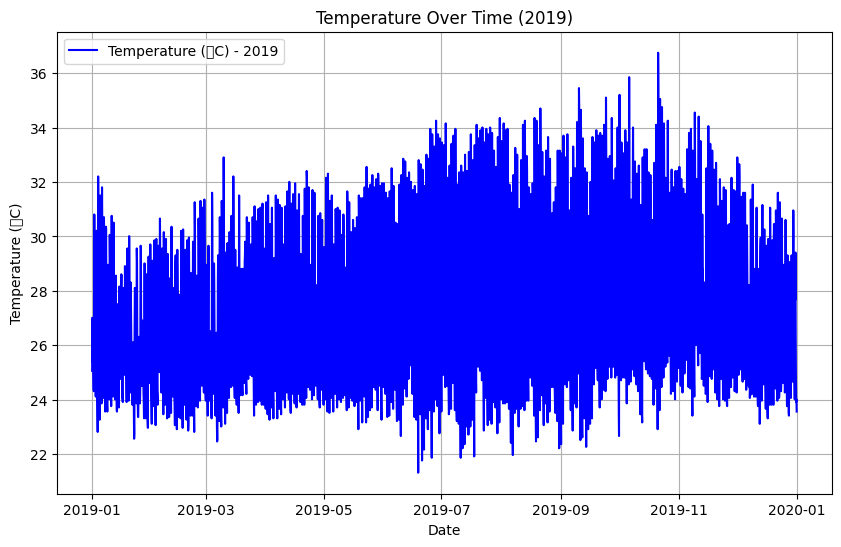

--- Analisis untuk Tahun 2020 ---


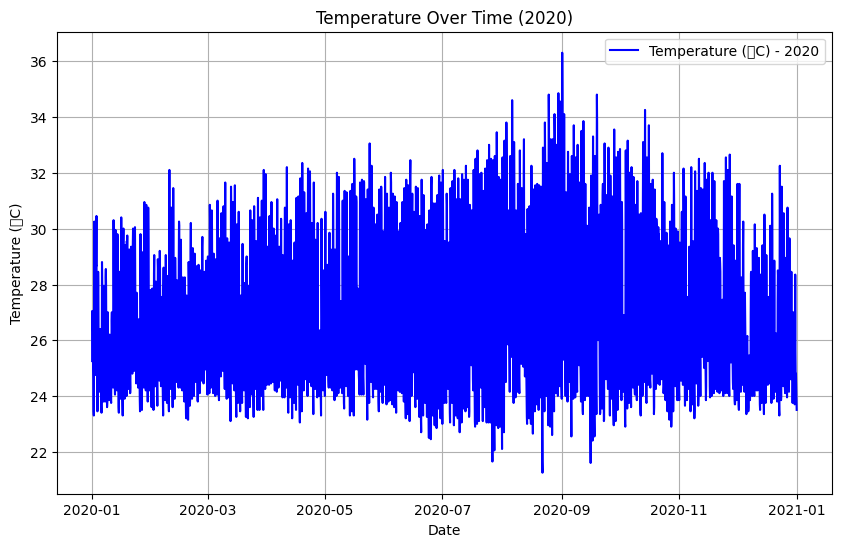

--- Analisis untuk Tahun 2021 ---


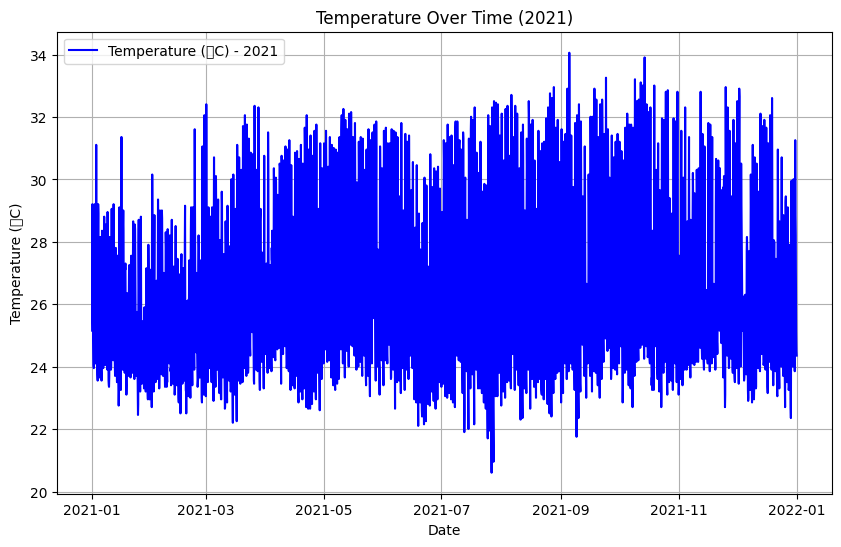

--- Analisis untuk Tahun 2022 ---


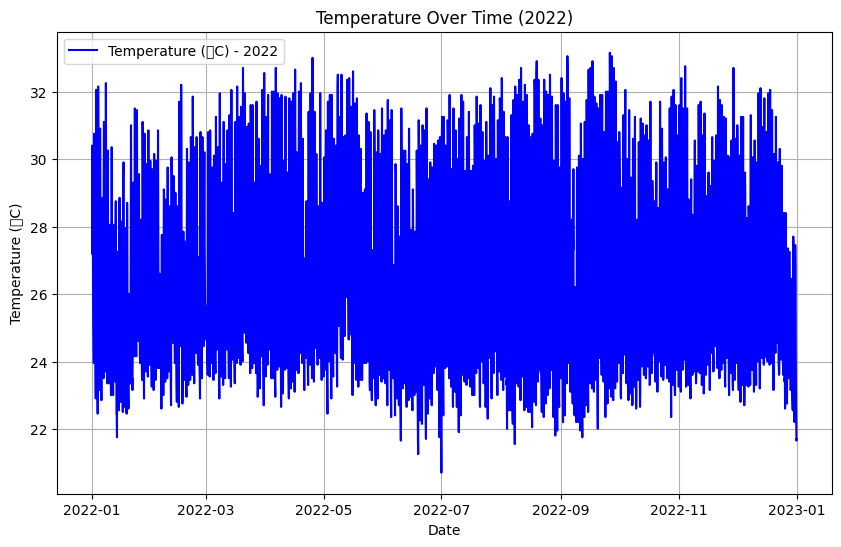

--- Analisis untuk Tahun 2023 ---


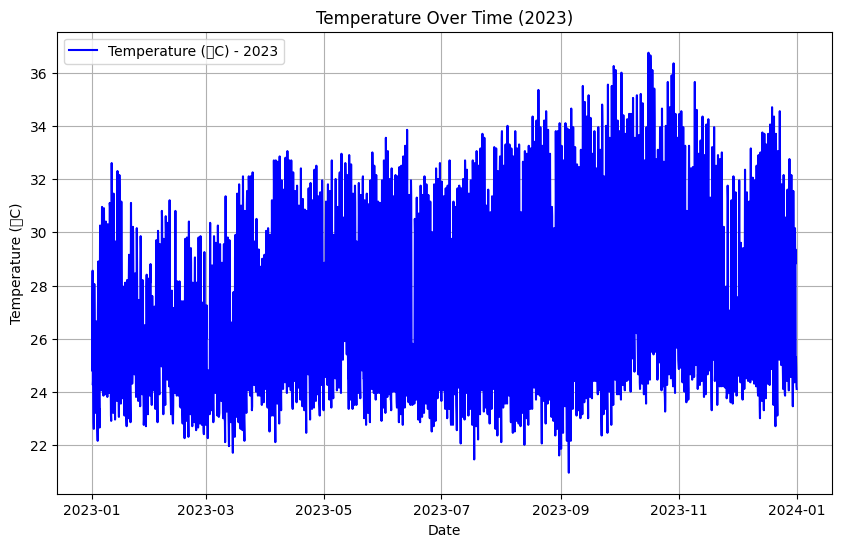

--- Analisis untuk Tahun 2024 ---


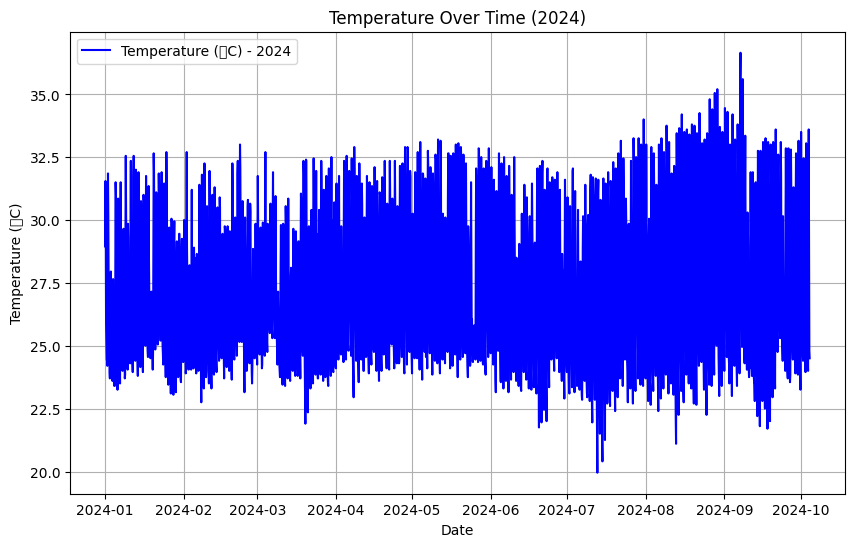

In [23]:
# Group the data by year
df['year'] = df.index.year
years = df['year'].unique()

for year in years:
    yearly_data = df[df['year'] == year]
    print(f'--- Analisis untuk Tahun {year} ---')

    # --- Plot Garis (Line Plot) untuk suhu per tahun ---
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_data.index, yearly_data['temperature_2m'], label=f'Temperature (째C) - {year}', color='blue')
    plt.title(f'Temperature Over Time ({year})')
    plt.xlabel('Date')
    plt.ylabel('Temperature (째C)')
    plt.legend()
    plt.grid(True)
    plt.show()

<h2>3. Konstruksi Model LSTM</h2>

<p>Section ini membahas proses pembangunan model LSTM</p>


<h2>3.1 Konstruksi Model LSTM Menggunakan keras tuner</h2>

<p>Section ini membahas proses pembangunan model LSTM</p>
<p>Untuk membangun model LSTM, digunakanlah keras tuner untuk mencari hyperparameter dengan performa paling baik sesuai dengan validation loss yang dihasilkan. Tuner menggunakan metode Bayesian Optimization. Metode ini digunakan agar menghasikan tuning yang lebih optimal dengan memprediksi hyperparameter terbaik selanjutnya berbasis tuning yang telah dilakukan. Value seperti epoch dan early stopping yang diimplementasikan digunakan agar tidak memakan terlalu banyak waktu dalam konstruksi model. Beberapa value seperti recurrent dropout dan optimizer yang digunakan berbasis dari pembahasan dalam diskusi berikut (https://stackoverflow.com/questions/48714407/rnn-regularization-which-component-to-regularize/58868383#58868383). </p>


In [16]:
def build_model(hp):
    model = Sequential()

    # First LSTM Layer
    model.add(
        LSTM(
            units=hp.Int("units_1", min_value=32, max_value=128, step=16),  # Tune LSTM units
            return_sequences=True,
            input_shape=(time_steps, X_train.shape[2]),
            recurrent_dropout=hp.Float("recurrent_dropout_1", min_value=0.1, max_value=0.5, step=0.1)
        )
    )

    # Second LSTM Layer
    model.add(
        LSTM(
            units=hp.Int("units_2", min_value=32, max_value=128, step=16),
            return_sequences=False,
            recurrent_dropout=hp.Float("recurrent_dropout_2", min_value=0.1, max_value=0.5, step=0.1)
        )
    )

    # Dense Output Layer
    model.add(Dense(1))  # Single output for temperature prediction

    # Tune optimizer and learning rate
    optimizer_choice = hp.Choice("optimizer", ["adam", "nadam", "rmsprop"])
    learning_rate = hp.Choice("learning_rate", [1e-3, 1e-4, 1e-5])  # Tune learning rate

    if optimizer_choice == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == "nadam":
        optimizer = Nadam(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate)

    # Compile the Model
    model.compile(
        optimizer=optimizer,
        loss="mean_squared_error"
    )
    return model


In [17]:
from keras_tuner import BayesianOptimization
tuner = BayesianOptimization(
    build_model,
    objective="val_loss",  # Minimize validation loss
    max_trials=10,         # Number of models to evaluate
    executions_per_trial=1,
    directory="my_tuning_dir",
    project_name="temperature_prediction_lstm_bayesian_with_optimizers"
)


Reloading Tuner from my_tuning_dir\temperature_prediction_lstm_bayesian_with_optimizers\tuner0.json


In [18]:
# Run the search for the best hyperparameters
tuner.search(
    X_train, y_train,
    epochs=50,  # untuk mengurangi waktu komputasi, diset cukupp rendah
    validation_data=(X_test, y_test),
    batch_size=32,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=5)
    ] #menggunakan early stopping
)


In [20]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of units in the first LSTM layer: {best_hps.get('units_1')}")
print(f"Best recurrent dropout for first LSTM layer: {best_hps.get('recurrent_dropout_1')}")
print(f"Best number of units in the second LSTM layer: {best_hps.get('units_2')}")
print(f"Best recurrent dropout for second LSTM layer: {best_hps.get('recurrent_dropout_2')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best optimizer: {best_hps.get('optimizer')}")


Best number of units in the first LSTM layer: 96
Best recurrent dropout for first LSTM layer: 0.4
Best number of units in the second LSTM layer: 48
Best recurrent dropout for second LSTM layer: 0.2
Best learning rate: 0.001
Best optimizer: nadam


<h2>3.2 Konstruksi Model LSTM</h2>

<p>Total waktu dalam menggunakan tuner bayesian optimization memakan 32 menit 19 detik. Hyperparameter yang terbaik ditemukan sesuai dengan value diatas</p>
<p>Optimizer yang ditentukan oleh bayesian optimization adalah Nadam, yaitu penggabungan dari metode optimisasi Adam dengan penambahan Nesterov Momentum. Penggabungan ini menghasilkan metode optimisasi yang membuat model dapat belajar lebih cepat dan lebih efisien dengan Adam yang mengadaptasikan learning rate untuk membuat pembelajaran lebih kokoh, dan Nesterov Momentum yang mempercepat learning dengan "mengantisipasi" posisi parameter untuk mempercepat proses optimisasi.</p>


In [38]:
model = Sequential([
    Input(shape=(time_steps, X_train.shape[2])), 
    LSTM(units=96, return_sequences=True, recurrent_dropout=0.4),
    LSTM(units=48, return_sequences=False, recurrent_dropout=0.2),
    Dense(units=1) #hanya memprediksi temperature
])

# Mengkompilasi model
# Menggunakan Nadam, dengan learning rate 0.001 yaitu value default Nadam
optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_file = 'best_epoch.model.keras'
checkpoint = ModelCheckpoint(model_file, monitor='val_loss', mode='min', save_best_only=True)
#menurut dokumentasi, model checkpoint perlu karena EarlyStopping hanya berlaku ketika mekanisme tersebut benar-benar memberhentikan model
#referensi full : https://pub.aimind.so/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6
history = model.fit(
    X_train, y_train,
    epochs=500, #epoch tinggi, RELY ON EARLY STOPPING
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint]
)

# Predict the temperature for training and testing data
model.load_weights(model_file)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#inverse transform values yang telah di MinMaxScale kembali ke value awal.
train_predict_inv = scaler_y.inverse_transform(train_predict)
test_predict_inv = scaler_y.inverse_transform(test_predict)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)

#lowest val loss: 0.0023

Epoch 1/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 4.0506e-05 - loss: 0.0256 - val_accuracy: 5.9827e-04 - val_loss: 0.0089
Epoch 2/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 2.2810e-05 - loss: 0.0059 - val_accuracy: 5.9827e-04 - val_loss: 0.0070
Epoch 3/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 2.2053e-04 - loss: 0.0043 - val_accuracy: 5.9827e-04 - val_loss: 0.0037
Epoch 4/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 3.3022e-05 - loss: 0.0035 - val_accuracy: 5.9827e-04 - val_loss: 0.0040
Epoch 5/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 6.5908e-05 - loss: 0.0033 - val_accuracy: 5.9827e-04 - val_loss: 0.0050
Epoch 6/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 5.8986e-05 - loss: 0.0034 - val_accuracy: 5.9827e-04 - val_loss: 0.0032
Epoch 7/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 2.6068e-04 - loss: 0.0030 - val_accuracy: 5.9827e-04 - val_loss: 0.0033
Epoch 8/500
421/421 ━━━━━━━━━━━━━

<h2>4. Evaluasi Model</h2>

<p>Evaluasi Model bisa dibagi ke beberapa bagian:

1. Evaluasi dalam per Epoch model. Evaluasi ini menggunakan loss function, yaitu Mean Squared Error. Angka ini adalah rata-rata dari perbedaan kuadrat value asli dan value yang di predict oleh model. Terdapat juga evaluasi menggunakan metric accuracy, yaitu metric yang lebih sering digunakan dalam tugas/masalah klasifikasi. PERLU DICATAT bahwa akurasi yang sangat rendah ini dikarenakan ketika ada perbedaan sedikit antara value asli dan value predicted, maka akan dianggap tidak akurat. Untuk ilustrasi: ketika kita memprediksi 24.0001, tetapi angka asli adalah 24.0002, maka akurasi akan dihitung sebagai 0 atau tidak akurat/benar.

2. Evaluasi setelah selesai training. Evaluasi ini menggunakan loss function awal yaitu Mean Squared Error(MSE) dan juga menggunakan metric lain yaitu Root Mean Squared Error (RMSE). RMSE merepresentasikan angka yang lebih dekat ke error yang dihasilkan. Untuk ilustrasi: RMSE yang dihasilkan adalah sekitar 0.8. Arti angka ini adalah bahwa secara rata-rata, prediksi yang dihasilkan oleh model melewati/menyimpang dari value asli sebesar 0.8. Dalam konteks data dan penelitian kami, artinya prediksi yang kami buat memiliki error sekitar 0.8 derajat dari temperatur asli. Jika kami memprediksi 24, maka value aslinya kemungkinan besar antara 24.8 atau 23.2 derajat celsius.


Untuk Catatan terakhir dalam evaluasi per Epoch, validation loss yang didapatkan menggunakan test set sebagai validation set per Epoch.


Penjelasan MSE dan RMSE: 
1. MSE: MSE adalah rata-rata dari selisih kuadrat antara nilai sebenarnya (actual values) dan nilai yang diprediksi (predicted values) dalam sebuah model. MSE mengukur tingkat kesalahan (error) dalam prediksi.Selisih kuadrat digunakan untuk menghilangkan tanda negatif dan memberikan bobot lebih besar pada kesalahan besar. Nilai MSE lebih kecil menunjukkan bahwa model lebih akurat.
2. RMSE: RMSE adalah akar kuadrat dari MSE. Dengan mengambil akar kuadrat, RMSE mengembalikan unit kesalahan ke skala yang sama seperti data aslinya, sehingga lebih mudah untuk diinterpretasikan. RMSE mengukur tingkat kesalahan dengan satuan yang sama dengan data asli.</p>

In [39]:
# Calculate training and test mean squared error
train_mse = mean_squared_error(y_train_inv, train_predict_inv)
test_mse = mean_squared_error(y_test_inv, test_predict_inv)

train_rmse = root_mean_squared_error(y_train_inv, train_predict_inv)
test_rmse = root_mean_squared_error(y_test_inv, test_predict_inv)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Training Root Mean Squared Error: {train_rmse}")
print(f"Test Root Mean Squared Error: {test_rmse}")

Training Mean Squared Error: 0.5590550981635869
Test Mean Squared Error: 0.6598677777192643
Training Root Mean Squared Error: 0.7476998717156416
Test Root Mean Squared Error: 0.8123224591990944


<h2>5. Interpretasi Hasil</h2>

<p>Line plot dibentuk untuk memperlihatkan hasil dari prediksi vs hasil aktual. Plot memberikan gambaran apabila ada pattern yang abnormal.

Terlihat dari hasil performance metrics yang digunakan beberapa kesimpulan bisa ditarik. Perbedaan antara performa dalam Training set dan test set dianggap normal atau tidak memiliki perbedaan yang terlalu jauh untuk mengindikasikan overfitting berat. Untuk diperjelas, perbedaan sekitar 0.05 pada metric RMSE tidak bisa dibilang terlalu jauh/biased kepada training set. RMSE adalah angka yang menunjukkan perbedaan asli antara value predicted dan value asli. Dalam konteks ini, pada test set model memiliki kesalahan/penyimpangan rata-rata pada prediksi sebesar 0.81 derajat celsius. Hasil ini dianggap cukup baik dalam konteks weather prediction, dimana secara umum error < 1 cukup baik. SESUAI DENGAN RANGE MIN DAN MAX DATASET, ERROR INI MENCAKUP ~ 4.7% dari dataset.</p>

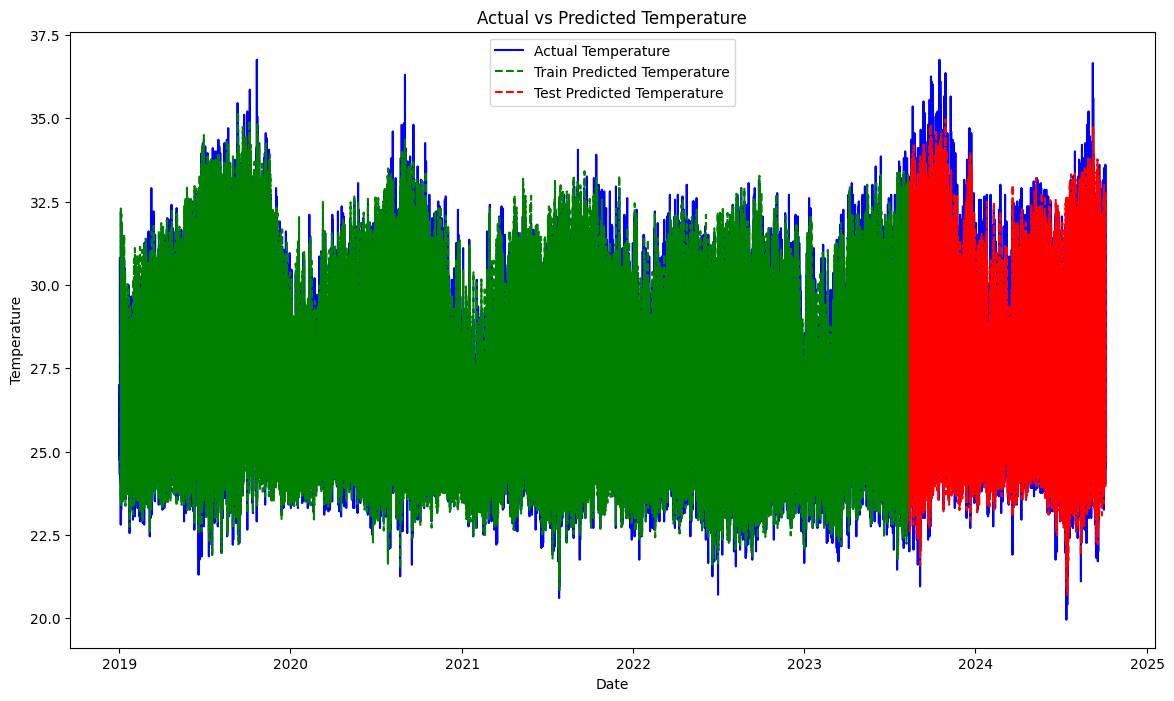

In [40]:
# Plot the results
plt.figure(figsize=(14, 8))

# Plot actual temperature
plt.plot(df.index, df['temperature_2m'], label='Actual Temperature', color='blue')

# Align training predictions with the training data index
train_index = df.index[time_steps:len(y_train) + time_steps]

plt.plot(train_index, train_predict_inv[:, 0], label='Train Predicted Temperature', color='green', linestyle='--')

# Align testing predictions with the testing data index
test_index = df.index[len(y_train) + 2 * time_steps:]  # Adjust for time steps
plt.plot(test_index, test_predict_inv[:, 0], label='Test Predicted Temperature', color='red', linestyle='--')

# Add labels and legend
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

<h2>Lanjutan: Konstruksi RandomForestRegressor untuk mencari feature importance dari dataset</h2>

<p>Untuk mengetahui feature yang memiliki kepentingan besar dan juga untuk meningkatkan efisiensi model, feature importance kami cek. Setelah mendapatkan hasil dari RandomForestRegressor, kami melakukan feature selection berikut:

- Top 7 feature, mengurangi 2 feature column dari dataset. Kami menganggap pilihan ini sebagai pilihan yang seimbang dikarenakan total feature column kami berjumlah 9. 2 feature column paling rendah akan diremove dari dataframe X yaitu dataframe yang mengandung target column.
- Top 5 feature, mengurangi 2 feature column lagi dari sebelumnya, bertotal mengurang 4 column dari dataset. Pilihan ini agak lebih drastis. 
- Overreliance testing, mengembalikan semua feature column kembali ke awal, lalu mengeliminasi feature yang paling berpengaruh. Overreliance testing ini hanya dilakukan ketika feature importance dari feature tersebut melebihi 0.7. Ketika melebihi nilai 0.7, fitur tersebut dianggap dominan dan akan diuji apabila model terlalu dependen kepada feature yang diremove. Model dapat dibilang overrely kepada feature yang dihilangkan ketika hasil RMSE yang dihasilkan jauh lebih buruk dibanding model lainnya (melebihi 1)</p>

                Feature  Importance
1  apparent_temperature    0.807488
0  relative_humidity_2m    0.183022
6        wind_speed_10m    0.006898
8     sunshine_duration    0.001701
7    wind_direction_10m    0.000366
5           cloud_cover    0.000298
2         precipitation    0.000084
3                  rain    0.000081
4          weather_code    0.000061


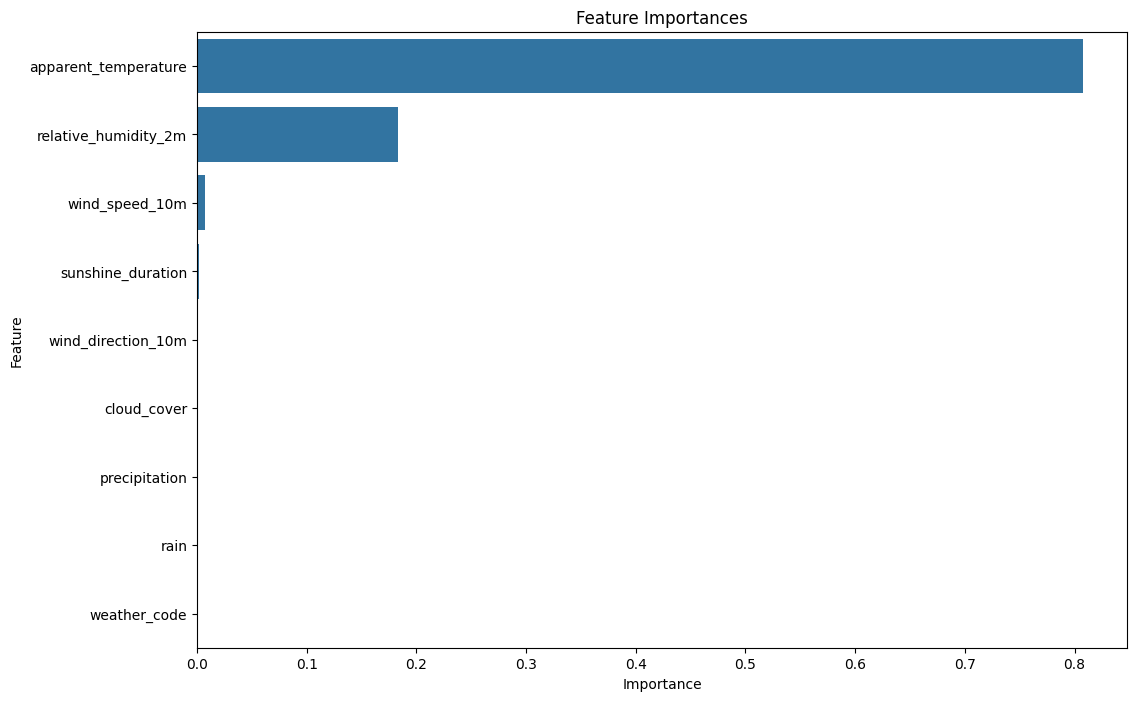

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['temperature_2m'])
y = df['temperature_2m']

# Train a RandomForestRegressor to get feature importances
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

# Get feature importances
importances = model_rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#feature importance ranking
print(feature_importances)


# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<h2>Tambahan konteks dataset</h2>

In [6]:
df.columns

Index(['temperature_2m', 'relative_humidity_2m', 'apparent_temperature',
       'precipitation', 'rain', 'weather_code', 'cloud_cover',
       'wind_speed_10m', 'wind_direction_10m', 'sunshine_duration'],
      dtype='object')

In [7]:
df.head()

,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,weather_code,cloud_cover,wind_speed_10m,wind_direction_10m,sunshine_duration
date,,,,,,,,,,
2019-01-01 02:00:00,25.057001,89.76280,28.358345,1.4,1.4,51.0,90.00001,16.099690,259.69522,0.0
2019-01-01 05:00:00,27.007000,82.42941,30.683567,0.9,0.9,51.0,96.00000,15.584300,263.36758,0.0
2019-01-01 08:00:00,25.957000,90.09765,30.923054,2.9,2.9,53.0,92.40000,8.669949,265.23645,0.0
2019-01-01 11:00:00,25.357000,88.97606,28.933128,0.7,0.7,51.0,82.80000,14.830076,264.42790,0.0
2019-01-01 14:00:00,25.507000,83.76391,28.705982,0.0,0.0,3.0,90.00001,13.979871,258.11136,0.0


<h2>Feature Selection 1: Top 7 feature</h2>

<p>Model ini dirancang dengan mengeliminasi 2 feature yang memiliki importance paling rendah sesuai dengan hasil RandomForestRegressor. Kedua feature paling rendah yaitu rain dan weather code.</p>

<h3>Feature Selection 1.1: Top 7 feature</h3>

<p>Pra proses data untuk model LSTM Top 7 features</p>

In [61]:
X = df.drop(columns=['temperature_2m','rain', 'weather_code']) #top 7
y = df['temperature_2m']
y = y.values.reshape(-1, 1)

In [62]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

# Function to create sequences
def create_sequences(features, target, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(features) - time_steps):
        X_seq.append(features[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

# Define time_steps
time_steps = 24

# Create sequences for training and testing data separately
X_train, y_train = create_sequences(X_train_raw, y_train_raw, time_steps)
X_test, y_test = create_sequences(X_test_raw, y_test_raw, time_steps)

<h3>Feature Selection 1.2: Top 7 feature</h3>

<p>Konstruksi Model dengan hyperparameter yang sama</p>

In [63]:
modeltop7 = Sequential([
    Input(shape=(time_steps, X_train.shape[2])), 
    LSTM(units=96, return_sequences=True, recurrent_dropout=0.4),
    LSTM(units=48, return_sequences=False, recurrent_dropout=0.2),
    Dense(units=1) #hanya memprediksi temperature
])

# Mengkompilasi model
# Menggunakan Nadam, dengan learning rate 0.001 yaitu value default Nadam
optimizer = Nadam(learning_rate=0.001)
modeltop7.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_file = 'best_epoch.model.keras'
checkpoint = ModelCheckpoint(model_file, monitor='val_loss', mode='min', save_best_only=True)
#menurut referensi, model checkpoint perlu karena EarlyStopping hanya berlaku ketika mekanisme tersebut benar-benar memberhentikan model
#referensi full : https://pub.aimind.so/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6

historytop7 = modeltop7.fit(
    X_train, y_train,
    epochs=500, #epoch tinggi, RELY ON EARLY STOPPING
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint]
)

# Predict the temperature for training and testing data
modeltop7.load_weights(model_file)

train_predict = modeltop7.predict(X_train)
test_predict = modeltop7.predict(X_test)

#inverse transform values yang telah di MinMaxScale kembali ke value awal.
train_predict_inv = scaler_y.inverse_transform(train_predict)
test_predict_inv = scaler_y.inverse_transform(test_predict)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)

Epoch 1/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 9.5273e-06 - loss: 0.0271 - val_accuracy: 5.9827e-04 - val_loss: 0.0086
Epoch 2/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 1.1248e-04 - loss: 0.0066 - val_accuracy: 5.9827e-04 - val_loss: 0.0057
Epoch 3/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 8.7568e-05 - loss: 0.0044 - val_accuracy: 5.9827e-04 - val_loss: 0.0039
Epoch 4/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 1.3692e-04 - loss: 0.0037 - val_accuracy: 5.9827e-04 - val_loss: 0.0121
Epoch 5/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 1.2006e-04 - loss: 0.0041 - val_accuracy: 5.9827e-04 - val_loss: 0.0034
Epoch 6/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 1.7750e-06 - loss: 0.0031 - val_accuracy: 5.9827e-04 - val_loss: 0.0041
Epoch 7/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 3.5528e-05 - loss: 0.0031 - val_accuracy: 5.9827e-04 - val_loss: 0.0048
Epoch 8/500
421/421 ━━━━━━━━━━━━━━

In [64]:
# Calculate training and test mean squared error
train_mse = mean_squared_error(y_train_inv, train_predict_inv)
test_mse = mean_squared_error(y_test_inv, test_predict_inv)

train_rmse = root_mean_squared_error(y_train_inv, train_predict_inv)
test_rmse = root_mean_squared_error(y_test_inv, test_predict_inv)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Training Root Mean Squared Error: {train_rmse}")
print(f"Test Root Mean Squared Error: {test_rmse}")

#lowest val loss: 0.0023

Training Mean Squared Error: 0.5193211696351789
Test Mean Squared Error: 0.6495204431756485
Training Root Mean Squared Error: 0.7206394172088971
Test Root Mean Squared Error: 0.8059283114369717


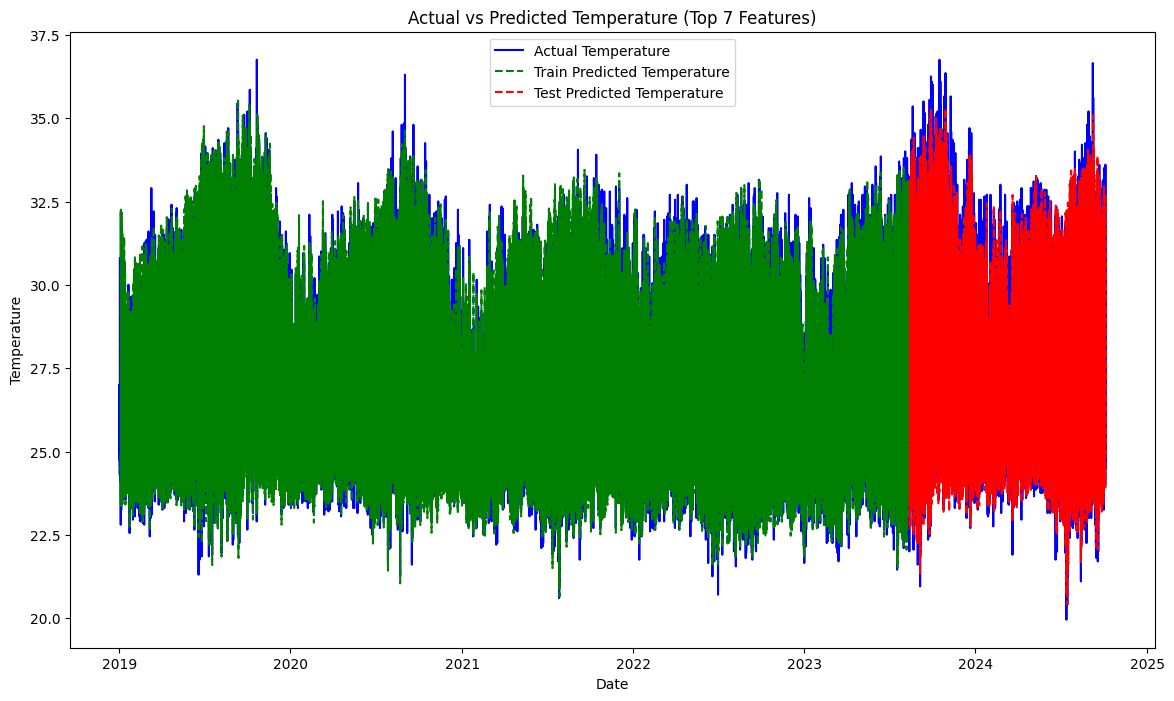

In [48]:
# Plot the results
plt.figure(figsize=(14, 8))
# Plot actual temperature
plt.plot(df.index, df['temperature_2m'], label='Actual Temperature', color='blue')

# Align training predictions with the training data index
train_index = df.index[time_steps:len(y_train) + time_steps]

plt.plot(train_index, train_predict_inv[:, 0], label='Train Predicted Temperature', color='green', linestyle='--')

# Align testing predictions with the testing data index
test_index = df.index[len(y_train) + 2 * time_steps:]  # Adjust for time steps
plt.plot(test_index, test_predict_inv[:, 0], label='Test Predicted Temperature', color='red', linestyle='--')

# Add labels and legend
plt.title('Actual vs Predicted Temperature (Top 7 Features)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

<h3>Feature Selection 1.3: Top 7 feature</h3>

<p>Interpretasi Hasil</p>
<p>Model ini menghasilkan performa yang lebih baik dibandingkan dengan model yang memakai semua fitur pada section 3. Karena mengurangi fitur dan alhasil mengurangi kompleksitas model, Model Feature Selection 1 ini dianggap model yang paling baik sejauh ini. Perlu dicatat namun bahwa peningkatan performa yang dihasilkan sangat kecil. </p>

<h2>Feature Selection 2: Top 5 feature</h2>

<p>Model ini dirancang dengan mengeliminasi 4 feature yang memiliki importance paling rendah sesuai dengan hasil RandomForestRegressor. Kedua feature paling rendah setelah rain dan weather code adalah precipitation dan cloud_cover</p>

<h3>Feature Selection 2.1: Top 5 feature</h3>

<p>Pra proses data untuk model LSTM Top 5 features</p>

In [74]:
X = df.drop(columns=['temperature_2m','rain', 'weather_code', 'precipitation', 'cloud_cover'])
#top 5
y = df['temperature_2m']
y = y.values.reshape(-1, 1)

In [75]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

# Function to create sequences
def create_sequences(features, target, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(features) - time_steps):
        X_seq.append(features[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

# Define time_steps
time_steps = 24

# Create sequences for training and testing data separately
X_train, y_train = create_sequences(X_train_raw, y_train_raw, time_steps)
X_test, y_test = create_sequences(X_test_raw, y_test_raw, time_steps)

<h3>Feature Selection 2.2: Top 5 feature</h3>

<p>Konstruksi model LSTM Top 5 features</p>

In [76]:
modeltop5 = Sequential([
    Input(shape=(time_steps, X_train.shape[2])), 
    LSTM(units=96, return_sequences=True, recurrent_dropout=0.4),
    LSTM(units=48, return_sequences=False, recurrent_dropout=0.2),
    Dense(units=1) #hanya memprediksi temperature
])

# Mengkompilasi model
# Menggunakan Nadam, dengan learning rate 0.001 yaitu value default Nadam
optimizer = Nadam(learning_rate=0.001)
modeltop5.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_file = 'best_epoch.model.keras'
checkpoint = ModelCheckpoint(model_file, monitor='val_loss', mode='min', save_best_only=True)
#menurut referensi, model checkpoint perlu karena EarlyStopping hanya berlaku ketika mekanisme tersebut benar-benar memberhentikan model
#referensi full : https://pub.aimind.so/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6

historytop5 = modeltop5.fit(
    X_train, y_train,
    epochs=500, #epoch tinggi, RELY ON EARLY STOPPING
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint]
)

# Predict the temperature for training and testing data
modeltop5.load_weights(model_file)

train_predict = modeltop5.predict(X_train)
test_predict = modeltop5.predict(X_test)

#inverse transform values yang telah di MinMaxScale kembali ke value awal.
train_predict_inv = scaler_y.inverse_transform(train_predict)
test_predict_inv = scaler_y.inverse_transform(test_predict)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)

Epoch 1/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0269 - val_accuracy: 5.9827e-04 - val_loss: 0.0249
Epoch 2/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 4.1114e-05 - loss: 0.0073 - val_accuracy: 5.9827e-04 - val_loss: 0.0052
Epoch 3/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 1.1660e-04 - loss: 0.0048 - val_accuracy: 5.9827e-04 - val_loss: 0.0048
Epoch 4/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 4.3598e-05 - loss: 0.0041 - val_accuracy: 5.9827e-04 - val_loss: 0.0071
Epoch 5/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 1.1831e-04 - loss: 0.0037 - val_accuracy: 5.9827e-04 - val_loss: 0.0121
Epoch 6/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 7.3545e-05 - loss: 0.0044 - val_accuracy: 5.9827e-04 - val_loss: 0.0048
Epoch 7/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 2.3049e-05 - loss: 0.0034 - val_accuracy: 5.9827e-04 - val_loss: 0.0041
Epoch 8/500
421/421 ━━━━━━━━━━━━━

In [77]:
# Calculate training and test mean squared error
train_mse = mean_squared_error(y_train_inv, train_predict_inv)
test_mse = mean_squared_error(y_test_inv, test_predict_inv)

train_rmse = root_mean_squared_error(y_train_inv, train_predict_inv)
test_rmse = root_mean_squared_error(y_test_inv, test_predict_inv)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Training Root Mean Squared Error: {train_rmse}")
print(f"Test Root Mean Squared Error: {test_rmse}")

#lowest val loss: 0.0026

Training Mean Squared Error: 0.634346401566978
Test Mean Squared Error: 0.7366713598193555
Training Root Mean Squared Error: 0.7964586628111832
Test Root Mean Squared Error: 0.8582956133054366


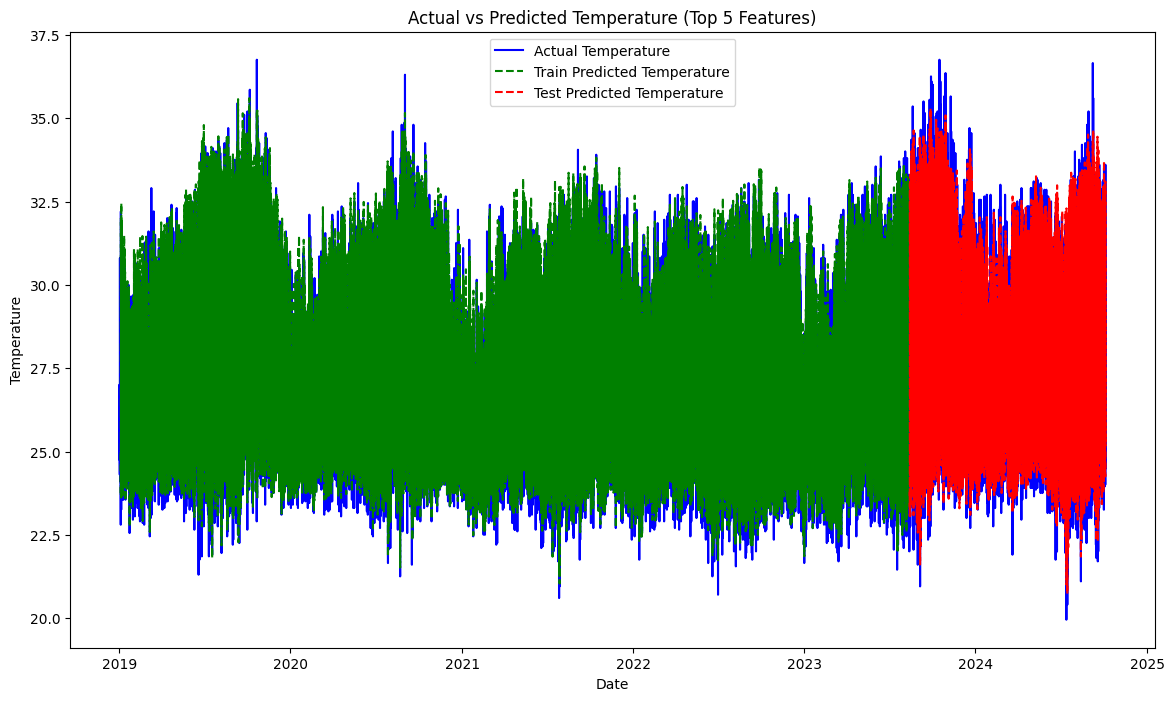

In [78]:
# Plot the results
plt.figure(figsize=(14, 8))
# Plot actual temperature
plt.plot(df.index, df['temperature_2m'], label='Actual Temperature', color='blue')

# Align training predictions with the training data index
train_index = df.index[time_steps:len(y_train) + time_steps]

plt.plot(train_index, train_predict_inv[:, 0], label='Train Predicted Temperature', color='green', linestyle='--')

# Align testing predictions with the testing data index
test_index = df.index[len(y_train) + 2 * time_steps:]  # Adjust for time steps
plt.plot(test_index, test_predict_inv[:, 0], label='Test Predicted Temperature', color='red', linestyle='--')

# Add labels and legend
plt.title('Actual vs Predicted Temperature (Top 5 Features)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

<h3>Feature Selection 2.3: Top 5 feature</h3>

<p>Interpretasi Hasil</p>
<p>Pada hasil yang ditunjukkan model ini, terlihat bahwa performa mulai memburuk dibandingkan model pada Section 3 dan Feature Selection 1. Hasil ini menunjukkan bahwa model ini telah mengurangi terlalu banyak fitur untuk bisa dicerna dengan baik oleh LSTM. Perbedaan performa meskipun memburuk, memiliki perbedaan error yang sebenarnya cukup kecil dibandingkan model lain pada Section 3 dan Feature Selection 1. Jika terdapat skenario dimana kemampuan komputer yang ada tidak memadai, mengurangi fitur menjadi 5 saja mungkin cukup layak jika memang terjadi.</p>

<h2>Feature Selection 3: Tanpa Apparent Temperature</h2>

<p>Model ini dirancang dengan mengeliminasi feature column yang dianggap dominan menurut RandomForestRegressor. Feature column yang dominan ini adalah apparent_temperature. Model ini dibentuk untuk mengetahui apabila model LSTM terlalu dependen terhadap feature column ini. Untuk masalah weather prediction, RMSE > 1 bisa dianggap cukup buruk dikarenakan prediksi menyimpang lebih dari 1 temperatur. Jika hasil RMSE dari model ini melebihi 1, kita bisa menganggap bahwa model ini terlalu dependen terhadap fitur tersebut</p>

<h3>Feature Selection 3.1: Tanpa Apparent Temperature</h3>

<p>Pra proses data untuk model LSTM Tanpa Apparent Temperature</p>

In [100]:
#all features, except apparent_temperature
X = df.drop(columns=['temperature_2m','apparent_temperature'])
#testing overreliance
y = df['temperature_2m']
y = y.values.reshape(-1, 1)
print(X.head())

                     relative_humidity_2m  precipitation  rain  weather_code  \
date                                                                           
2018-12-31 17:00:00             82.992380            0.0   0.0           1.0   
2018-12-31 20:00:00             85.510765            0.0   0.0           2.0   
2018-12-31 23:00:00             87.590706            0.0   0.0           2.0   
2019-01-01 02:00:00             89.762800            1.4   1.4          51.0   
2019-01-01 05:00:00             82.429410            0.9   0.9          51.0   

                     cloud_cover  wind_speed_10m  wind_direction_10m  \
date                                                                   
2018-12-31 17:00:00    33.900000       20.037485           252.21602   
2018-12-31 20:00:00    66.900000       15.226764           263.21112   
2018-12-31 23:00:00    60.600002       15.480000           270.00000   
2019-01-01 02:00:00    90.000010       16.099690           259.69522   
2019-01

In [101]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

# Function to create sequences
def create_sequences(features, target, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(features) - time_steps):
        X_seq.append(features[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

# Define time_steps
time_steps = 24

# Create sequences for training and testing data separately
X_train, y_train = create_sequences(X_train_raw, y_train_raw, time_steps)
X_test, y_test = create_sequences(X_test_raw, y_test_raw, time_steps)

<h3>Feature Selection 3.2: Tanpa Apparent Temperature</h3>

<p>Konstruksi model LSTM Tanpa Apparent Temperature</p>

In [102]:
model_no_apparent = Sequential([
    Input(shape=(time_steps, X_train.shape[2])), 
    LSTM(units=96, return_sequences=True, recurrent_dropout=0.4),
    LSTM(units=48, return_sequences=False, recurrent_dropout=0.2),
    Dense(units=1) #hanya memprediksi temperature
])

# Mengkompilasi model
# Menggunakan Nadam, dengan learning rate 0.001 yaitu value default Nadam
optimizer = Nadam(learning_rate=0.001)
model_no_apparent.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_file = 'best_epoch.model.keras'
checkpoint = ModelCheckpoint(model_file, monitor='val_loss', mode='min', save_best_only=True)
#menurut referensi, model checkpoint perlu karena EarlyStopping hanya berlaku ketika mekanisme tersebut benar-benar memberhentikan model
#referensi full : https://pub.aimind.so/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6

historytop5 = model_no_apparent.fit(
    X_train, y_train,
    epochs=500, #epoch tinggi, RELY ON EARLY STOPPING
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint]
)

# Predict the temperature for training and testing data
model_no_apparent.load_weights(model_file)

train_predict = model_no_apparent.predict(X_train)
test_predict = model_no_apparent.predict(X_test)

#inverse transform values yang telah di MinMaxScale kembali ke value awal.
train_predict_inv = scaler_y.inverse_transform(train_predict)
test_predict_inv = scaler_y.inverse_transform(test_predict)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)

Epoch 1/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 6.0558e-05 - loss: 0.0238 - val_accuracy: 5.9827e-04 - val_loss: 0.0083
Epoch 2/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 4.7156e-05 - loss: 0.0067 - val_accuracy: 5.9827e-04 - val_loss: 0.0063
Epoch 3/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 1.1918e-04 - loss: 0.0047 - val_accuracy: 5.9827e-04 - val_loss: 0.0044
Epoch 4/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 3.3848e-05 - loss: 0.0041 - val_accuracy: 5.9827e-04 - val_loss: 0.0050
Epoch 5/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 1.3692e-04 - loss: 0.0037 - val_accuracy: 5.9827e-04 - val_loss: 0.0076
Epoch 6/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 3.7247e-05 - loss: 0.0036 - val_accuracy: 5.9827e-04 - val_loss: 0.0041
Epoch 7/500
421/421 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 5.6443e-06 - loss: 0.0034 - val_accuracy: 5.9827e-04 - val_loss: 0.0047
Epoch 8/500
421/421 ━━━━━━━━━━━━

In [107]:
# Calculate training and test mean squared error
train_mse = mean_squared_error(y_train_inv, train_predict_inv)
test_mse = mean_squared_error(y_test_inv, test_predict_inv)

train_rmse = root_mean_squared_error(y_train_inv, train_predict_inv)
test_rmse = root_mean_squared_error(y_test_inv, test_predict_inv)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Training Root Mean Squared Error: {train_rmse}")
print(f"Test Root Mean Squared Error: {test_rmse}")

#lowest val loss: 0.0032

Training Mean Squared Error: 0.7517908965962687
Test Mean Squared Error: 0.9023649115975199
Training Root Mean Squared Error: 0.8670587619050215
Test Root Mean Squared Error: 0.9499288981800269


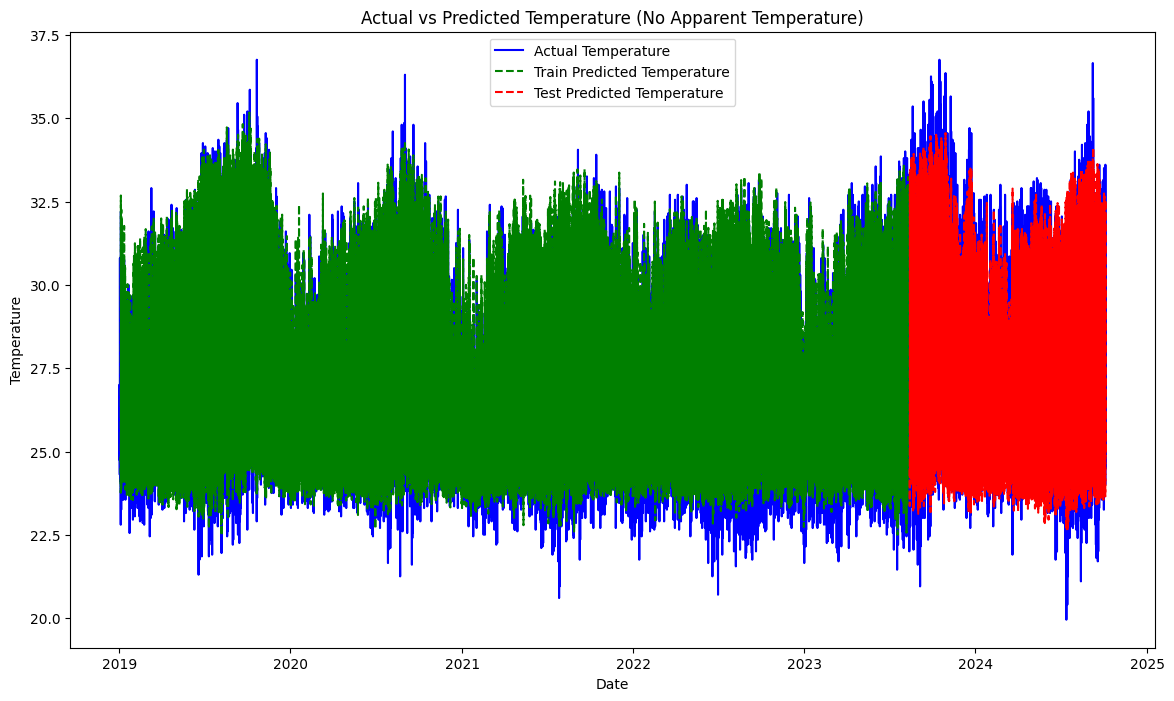

In [116]:
# Plot the results
plt.figure(figsize=(14, 8))
# Plot actual temperature
plt.plot(df.index, df['temperature_2m'], label='Actual Temperature', color='blue')

# Align training predictions with the training data index
train_index = df.index[time_steps:len(y_train) + time_steps]

plt.plot(train_index, train_predict_inv[:, 0], label='Train Predicted Temperature', color='green', linestyle='--')

# Align testing predictions with the testing data index
test_index = df.index[len(y_train) + 2 * time_steps:]  # Adjust for time steps
plt.plot(test_index, test_predict_inv[:, 0], label='Test Predicted Temperature', color='red', linestyle='--')

# Add labels and legend
plt.title('Actual vs Predicted Temperature (No Apparent Temperature)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

<h3>Feature Selection 3.3: Tanpa Apparent Temperature</h3>

<p>Interpretasi Hasil model LSTM Tanpa Apparent Temperature</p>
<p>Model Feature Selection 3.3 ini memiliki hasil performa paling buruk diantara semua model yang dibuat pada Section 3, Feature Selection 1, dan Feature Selection 2. Mengeliminasi fitur apparent_temperature memperburuk prediksi yang model bisa buat, dan juga jika dilihat dalam Plot yang dihasilkan mengindikasikan pattern yang menarik. Model ini tidak dapat memprediksi temperatur dalam keadaan ekstrem (< 23 Derajat dan > 35 derajat). Model ini menujukkan seberapa penting apparent_temperature dalam memberikan prediksi yang lebih dekat dengan angka asli. Namun, hasil yang ditunjukkan juga memiliki sisi positif dimana meskipun RMSE yang ditunjukkan lebih besar, nilai RMSE <b>belum bisa dianggap fatal</b> dalam mencoba untuk memprediksi temperatur dengan baik. Nilai RMSE < 1 ini mencakup hanya sekitar ~5.7% dari dataset secara keseluruhan</p>

<h2>Komparasi Akhir</h2>

<p>Section ini pembuatan plot untuk komparasi hasil akhir dari performance metrics yang dihasilkan.</p>

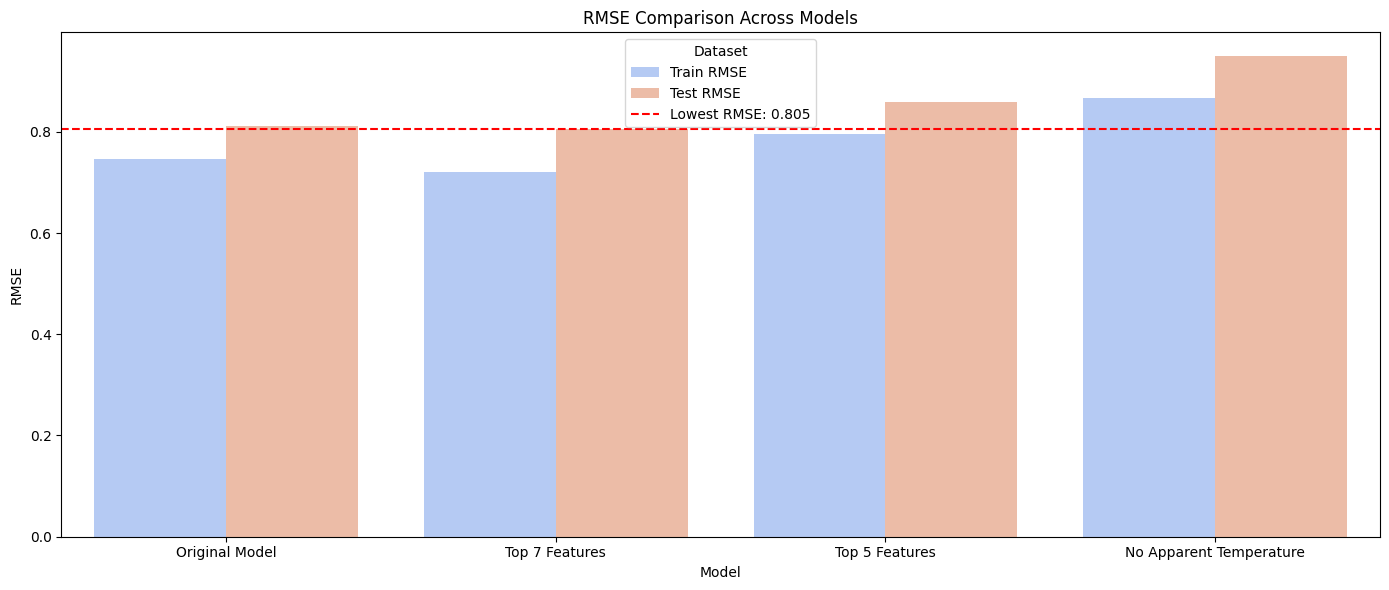

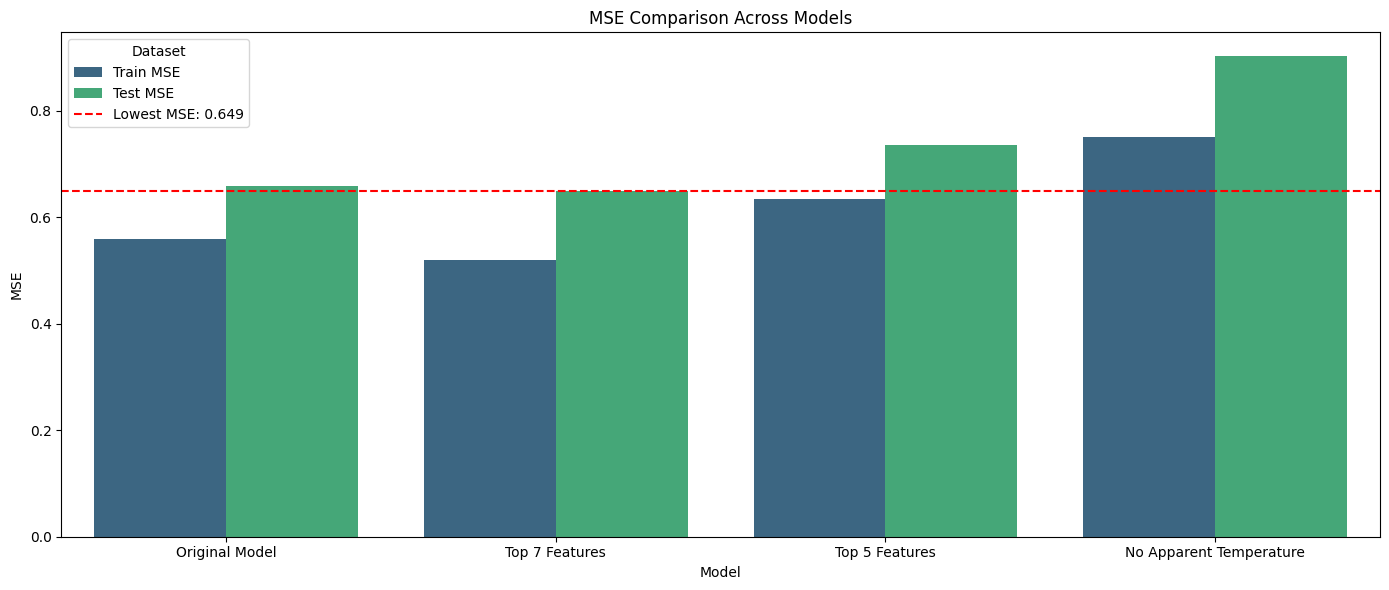

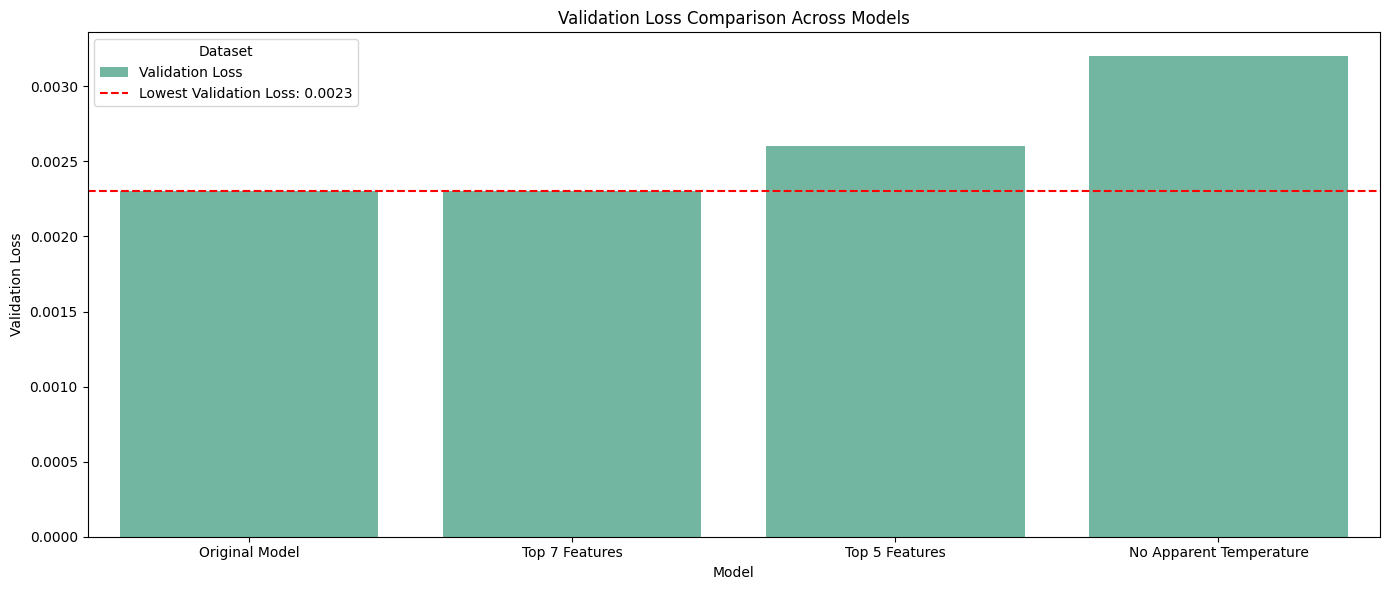

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np


results = [
    {"Model": "Original Model", "Train MSE": 0.559, "Test MSE": 0.659, "Train RMSE": 0.747, "Test RMSE": 0.812, "Validation Loss": 0.0023},
    {"Model": "Top 7 Features", "Train MSE": 0.519, "Test MSE": 0.649, "Train RMSE": 0.720, "Test RMSE": 0.805, "Validation Loss": 0.0023},
    {"Model": "Top 5 Features", "Train MSE": 0.634, "Test MSE": 0.736, "Train RMSE": 0.796, "Test RMSE": 0.858, "Validation Loss": 0.0026},
    {"Model": "No Apparent Temperature", "Train MSE": 0.751, "Test MSE": 0.902, "Train RMSE": 0.867, "Test RMSE": 0.949, "Validation Loss": 0.0032},
]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Separate RMSE and MSE metrics
results_rmse = results_melted[results_melted["Metric"].str.contains("RMSE")]
results_mse = results_melted[results_melted["Metric"].str.contains(" MSE")]
results_val_loss = results_melted[results_melted["Metric"].str.contains("Validation Loss")]

# Plot RMSE
plt.figure(figsize=(14, 6))
plt.title("RMSE Comparison Across Models")
sns.barplot(data=results_rmse, x="Model", y="Value", hue="Metric", palette="coolwarm")
test_rmse = results_rmse[results_rmse["Metric"] == "Test RMSE"]
min_rmse_value = test_rmse["Value"].min()#redline
plt.axhline(y=min_rmse_value, color="red", linestyle="--", label=f"Lowest RMSE: {min_rmse_value:.3f}")

plt.ylabel("RMSE")
plt.xlabel("Model")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(14, 6))
plt.title("MSE Comparison Across Models")
sns.barplot(data=results_mse, x="Model", y="Value", hue="Metric", palette="viridis")
test_mse = results_mse[results_mse["Metric"] == "Test MSE"]
min_test_mse_value = test_mse["Value"].min() #redline
plt.axhline(y=min_test_mse_value, color="red", linestyle="--", label=f"Lowest MSE: {min_test_mse_value:.3f}")

plt.ylabel("MSE")
plt.xlabel("Model")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

#validation loss plot
plt.figure(figsize=(14, 6))
plt.title("Validation Loss Comparison Across Models")
sns.barplot(data=results_val_loss, x="Model", y="Value", hue="Metric", palette="Set2")
min_val_loss = results_val_loss["Value"].min() #redline
plt.axhline(y=min_val_loss, color="red", linestyle="--", label=f"Lowest Validation Loss: {min_val_loss:.4f}")

plt.ylabel("Validation Loss")
plt.xlabel("Model")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()